In [ ]:
### I'm working on the project about transcriptional start site(TSS) in yeast genome system.
### Capping is the first modification made to RNA polymerase II-transcribed RNA. I currently got some data
### from sequencing which shows whether each nucleotide was capped or not. I have both wild type yeast genome
### and dcp2 mutant yeast genome, 2 samples for each. So I'm thinking that I could use the knowledge I learned
### in this course to compare the difference so that I could know the effect of dcp2 mutant to the capping
### rate, namely the transcription. I also have a TSS cluster database as reference. It gives the positions 
### of effective genes. With it, I can filter my sequence data and only leave those nucleotide at specific
### positions.

In [22]:
###TSS_cluster_input

import pandas as pd

tss=pd.read_csv('./Data/TSS_cluster_coordinates.txt',sep='\t')
tss_sort1=tss.dropna(axis=0,subset = ["Assigned_gene_name"])
tss_sort2=tss_sort1.dropna(axis=0,subset = ["start"])
tss_sort=tss_sort2.dropna(axis=0,subset = ["end"])
tss_sort_pos=tss_sort[tss_sort['Strand.dcp2']=='+']
tss_sort_neg=tss_sort[tss_sort['Strand.dcp2']=='-']
print(tss_sort_pos)

      TC_ID  Chr.wt     start       end Strand.dcp2 Assigned_gene_name  \
1         2    chrI    9327.0    9373.0           +            YAL066W   
2         3    chrI   11318.0   11343.0           +          YAL064W-B   
12       13    chrI   31108.0   31119.0           +            YAL062W   
13       14    chrI   31188.0   31242.0           +            YAL062W   
14       15    chrI   31519.0   31569.0           +            YAL062W   
...     ...     ...       ...       ...         ...                ...   
6954   6972  chrXVI  931061.0  931124.0           +            YPR196W   
6955   6973  chrXVI  931309.0  931428.0           +            YPR196W   
6958   6976  chrXVI  933979.0  934048.0           +            YPR198W   
6966   6984  chrXVI  939847.0  939924.0           +            YPR201W   
6969   6987  chrXVI  942757.0  942827.0           +            YPR202W   

     in_coding_gene  
1               NaN  
2               NaN  
12              NaN  
13              NaN  
1

In [5]:
###positive strand all chrome(I separated the tss file to positive and negative so that I can run them together to save time,
### but obviously, I have to write more functions and I need to combine them at last. I still chose this way 
### because the scer files are really huge.)

def positive_singlechr_cap(filename,chrom):
    df=pd.read_csv(filename,sep='\t')
    scer=df[(df['strand']=='+')]
    scer_chrom=scer[(scer['chr']==chrom)]
    tss_chrom=tss_sort_pos[(tss_sort_pos['Chr.wt']==chrom)]
    scer_gene=[]
    for i,row in tss_chrom.iterrows():
        start=row['start']
        end=row['end']
        for j,row1 in scer_chrom.iterrows():
            pos=row1['pos']
            if pos>=start and pos<=end:                    
                scer_gene.append(row1)
    scer_cap=pd.DataFrame.from_dict(scer_gene)
    scer_cap.reset_index(inplace=True, drop=True)
                
    return scer_cap

def positive_cap(filename):
    df=pd.read_csv(filename,sep='\t')
    all=[positive_singlechr_cap(filename,'chrI'),positive_singlechr_cap(filename,'chrII'),positive_singlechr_cap(filename,'chrIII'),
        positive_singlechr_cap(filename,'chrIV'),positive_singlechr_cap(filename,'chrIX'),positive_singlechr_cap(filename,'chrM'),
        positive_singlechr_cap(filename,'chrV'),positive_singlechr_cap(filename,'chrVI'),positive_singlechr_cap(filename,'chrVII'),
        positive_singlechr_cap(filename,'chrVIII'),positive_singlechr_cap(filename,'chrX'),positive_singlechr_cap(filename,'chrXI'),
        positive_singlechr_cap(filename,'chrXII'),positive_singlechr_cap(filename,'chrXIII'),positive_singlechr_cap(filename,'chrXIV'),
        positive_singlechr_cap(filename,'chrXV'),positive_singlechr_cap(filename,'chrXVI')]
    cap=pd.concat(all)
    cap.reset_index(inplace=True, drop=True)
    return cap

###Export 4 positive list

dcp2_2=positive_cap('./Data/Scer.dcp2.2.tss')
outputpath='./Data/list/p_dcp2_2.csv'
dcp2_2.to_csv(outputpath,sep=',',index=False,header=False)

In [6]:
###negative strand all chrome
def negative_singlechr_cap(filename,chrom):
    df=pd.read_csv(filename,sep='\t')
    scer=df[(df['strand']=='-')]
    scer_chrom=scer[(scer['chr']==chrom)]
    tss_chrom=tss_sort_neg[(tss_sort_neg['Chr.wt']==chrom)]
    scer_gene=[]
    for i,row in tss_chrom.iterrows():
        start=row['start']
        end=row['end']
        for j,row1 in scer_chrom.iterrows():
            pos=row1['pos']
            if pos>=start and pos<=end:                    
                scer_gene.append(row1)
    scer_cap=pd.DataFrame.from_dict(scer_gene)
    scer_cap.reset_index(inplace=True, drop=True)
                
    return scer_cap

def neg_cap(filename):
    df=pd.read_csv(filename,sep='\t')
    all=[negative_singlechr_cap(filename,'chrI'),negative_singlechr_cap(filename,'chrII'),negative_singlechr_cap(filename,'chrIII'),
        negative_singlechr_cap(filename,'chrIV'),negative_singlechr_cap(filename,'chrIX'),negative_singlechr_cap(filename,'chrM'),
        negative_singlechr_cap(filename,'chrV'),negative_singlechr_cap(filename,'chrVI'),negative_singlechr_cap(filename,'chrVII'),
        negative_singlechr_cap(filename,'chrVIII'),negative_singlechr_cap(filename,'chrX'),negative_singlechr_cap(filename,'chrXI'),
        negative_singlechr_cap(filename,'chrXII'),negative_singlechr_cap(filename,'chrXIII'),negative_singlechr_cap(filename,'chrXIV'),
        negative_singlechr_cap(filename,'chrXV'),negative_singlechr_cap(filename,'chrXVI')]
    cap=pd.concat(all)
    cap.reset_index(inplace=True, drop=True)
    return cap

###Export 4 negative list

dcp2_2=neg_cap('./Data/Scer.dcp2.2.tss')
outputpath='./Data/list/n_dcp2_2.csv'
dcp2_2.to_csv(outputpath,sep=',',index=False,header=False)

In [228]:
###Combine positive and negative strand list

import pandas as pd

def combine_strand(pos,neg):
    pos_list=pd.read_csv(pos)
    neg_list=pd.read_csv(neg)
    pos_list.columns = ["chr","pos","strand","genomeTSS","capped","tags"]
    neg_list.columns = ["chr","pos","strand","genomeTSS","capped","tags"]
    all=[pos_list,neg_list]
    combine=pd.concat(all)
    
    return combine

wt2=combine_strand('./Data/list/p_wt2.csv','./Data/list/n_wt2.csv')
outputpath='./Data/list/combine/wt2.csv'
wt2.to_csv(outputpath,sep=',',index=False,header=True)

In [25]:
test1=pd.read_csv('./Data/list/combine/wt2.csv')
test1
###Nearly 400,000 ineffective nucleotides were filtered.

,chr,pos,strand,genomeTSS,capped,tags
0,chrI,9340,+,G,1,1
1,chrI,9356,+,G,1,1
2,chrI,9361,+,A,1,4
3,chrI,9362,+,G,1,1
4,chrI,9368,+,G,1,2
...,...,...,...,...,...,...
172331,chrXVI,939721,-,A,1,3
172332,chrXVI,939700,-,G,0,3
172333,chrXVI,939718,-,G,0,1
172334,chrXVI,939712,-,C,0,1


In [26]:
def capping_rate(filename):
    df=pd.read_csv(filename)
    cap=0
    uncap=0
    for i,row in df.iterrows():
        capped=row[4]
        tag=row[5]
        if capped==1:
            cap+=tag
        else:
            uncap+=tag
    capping_rate=cap/(cap+uncap)
    return capping_rate



wt2=capping_rate('./Data/list/combine/wt2.csv')
wt1=capping_rate('./Data/list/combine/wt1.csv')
dcp2_1=capping_rate('./Data/list/combine/dcp2_1.csv')
dcp2_2=capping_rate('./Data/list/combine/dcp2_2.csv')




<BarContainer object of 2 artists>

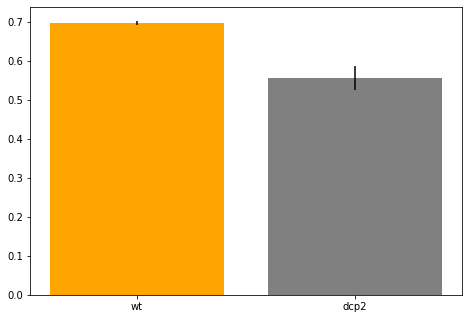

In [10]:
import numpy as np
import matplotlib.pyplot as plt

wt=[wt1,wt2]
dcp2=[dcp2_1,dcp2_2]


error_wt=np.std(wt, ddof = 1)
error_dcp2=np.std(dcp2, ddof = 1)


average_wt=np.average(wt,axis=0)
average_dcp2=np.average(dcp2, axis=0)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
scer = ['wt','dcp2']
rate = [average_wt,average_dcp2]
std_err=[error_wt,error_dcp2]
ax.bar(scer,rate)
plt.bar(scer,rate,color=['orange','gray'],yerr=std_err)

In [ ]:
###The capping rate decreased after dcp2 gene mutant.

In [11]:
###Capping rate for A/T/G/C
def genome_capping_rate(file):
    df=pd.read_csv(file)
    cap_A=0
    uncap_A=0
    cap_T=0
    uncap_T=0
    cap_G=0
    uncap_G=0
    cap_C=0
    uncap_C=0
    for i,row in df.iterrows():
        genome=row[3]
        capped=row[4]
        tag=row[5]
        if genome=='A':
            if capped==1:
                cap_A+=tag
            else:
                uncap_A+=tag
        elif genome=='T':
            if capped==1:
                cap_T+=tag
            else:
                uncap_T+=tag
        elif genome=='G':
            if capped==1:
                cap_G+=tag
            else:
                uncap_G+=tag
        elif genome=='C':
            if capped==1:
                cap_C+=tag
            else:
                uncap_C+=tag
    capping_rate_A=cap_A/(cap_A+uncap_A)
    capping_rate_T=cap_T/(cap_T+uncap_T)
    capping_rate_G=cap_G/(cap_G+uncap_G)
    capping_rate_C=cap_C/(cap_C+uncap_C)
    
    rate = [capping_rate_A,capping_rate_G, capping_rate_C, capping_rate_T]
   
    return rate

def error(file1,file2):

    rate1=genome_capping_rate(file1)
    rate2=genome_capping_rate(file2)
    geno_a=[rate1[0],rate2[0]]
    error_a=np.std(geno_a, ddof = 1)
    geno_g=[rate1[1],rate2[1]]
    error_g=np.std(geno_g, ddof = 1)
    geno_c=[rate1[2],rate2[2]]
    error_c=np.std(geno_c, ddof = 1)
    geno_t=[rate1[3],rate2[3]]
    error_t=np.std(geno_t, ddof = 1)
    error=[error_a,error_g,error_c,error_t]
    return error

def average(file1,file2):
    rate1=genome_capping_rate(file1)
    rate2=genome_capping_rate(file2)
    geno_a=np.average([rate1[0],rate2[0]],axis=0)
    geno_g=np.average([rate1[1],rate2[1]],axis=0)
    geno_c=np.average([rate1[2],rate2[2]],axis=0)
    geno_t=np.average([rate1[3],rate2[3]],axis=0)

    average=[geno_a,geno_g,geno_c,geno_t]
    return average

error_dcp2=error('./Data/list/combine/dcp2_1.csv','./Data/list/combine/dcp2_2.csv')
error_wt=error('./Data/list/combine/wt1.csv','./Data/list/combine/wt2.csv')
average_wt=average('./Data/list/combine/wt1.csv','./Data/list/combine/wt2.csv')
average_dcp2=average('./Data/list/combine/dcp2_1.csv','./Data/list/combine/dcp2_2.csv')



In [12]:
###Bar plot
def plot(file1,file2):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    genome = ['A','G','C','T']
    rate = average(file1,file2)
    std_err=error(file1,file2)
    ax.bar(genome,rate)
    return(plt.bar(genome,rate,color=['g','yellow','orange','gray'],yerr=std_err))



<BarContainer object of 4 artists>

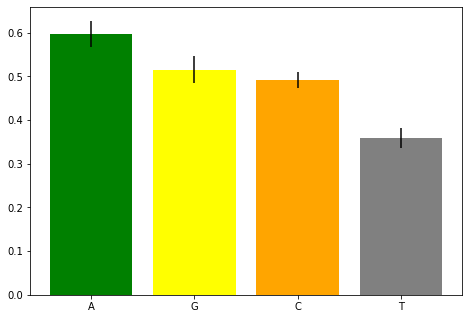

In [13]:
plot('./Data/list/combine/dcp2_1.csv','./Data/list/combine/dcp2_2.csv')

<BarContainer object of 4 artists>

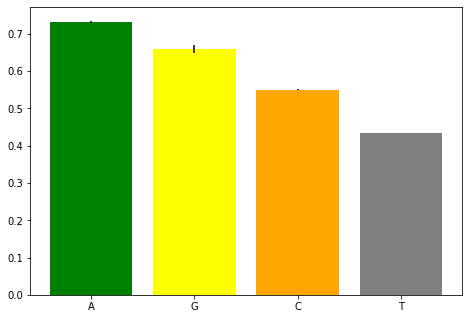

In [14]:
plot('./Data/list/combine/wt1.csv','./Data/list/combine/wt2.csv')

In [ ]:
### More A/G was capped then C/T.

In [7]:
### Add TC_ID and Asigned gene for single pos chrom
###(It took me long time to run the two function above but I forgot to add the ID to the output list, 
### so I have to loop again. But since I'm using the sorted one for this function, it took less time.)
def add_ID(filename,chrom):    
    df=pd.read_csv(filename)
    scer=df[(df['strand']=='+')]
    scer_chrom=scer[(scer['chr']==chrom)]
    tss_chrom=tss_sort_pos[(tss_sort_pos['Chr.wt']==chrom)]
    scer_chrom['ID']=''
    scer_chrom['Assigned_gene']=''
    for i,row in tss_chrom.iterrows():
        ID=row['TC_ID']
        start=row['start']
        gene=row['Assigned_gene_name']
        end=row['end']
        for j,row1 in scer_chrom.iterrows():
            pos=row1['pos']
            if pos>=start and pos<=end:
                scer_chrom.loc[j, 'ID'] = ID
                scer_chrom.loc[j, 'Assigned_gene']=gene
    return scer_chrom



In [8]:
###Add TC_ID and Asigned gene for single neg chrom
def add_ID(filename,chrom):    
    df=pd.read_csv(filename)
    scer=df[(df['strand']=='-')]
    scer_chrom=scer[(scer['chr']==chrom)]
    tss_chrom=tss_sort_neg[(tss_sort_neg['Chr.wt']==chrom)]
    scer_chrom['ID']=''
    scer_chrom['Assigned_gene']=''
    for i,row in tss_chrom.iterrows():
        ID=row['TC_ID']
        start=row['start']
        gene=row['Assigned_gene_name']
        end=row['end']
        for j,row1 in scer_chrom.iterrows():
            pos=row1['pos']
            if pos>=start and pos<=end:
                scer_chrom.loc[j, 'ID'] = ID
                scer_chrom.loc[j, 'Assigned_gene']=gene
    return scer_chrom

In [22]:
###Add TC_ID and Asigned gene for all pos/neg chrom(I used the same function name for both positive and negative)
def all_addid(filename):
    df=pd.read_csv(filename)
    all=[add_ID(filename,'chrI'),add_ID(filename,'chrII'),add_ID(filename,'chrIII'),
        add_ID(filename,'chrIV'),add_ID(filename,'chrIX'),add_ID(filename,'chrM'),
        add_ID(filename,'chrV'),add_ID(filename,'chrVI'),add_ID(filename,'chrVII'),
        add_ID(filename,'chrVIII'),add_ID(filename,'chrX'),add_ID(filename,'chrXI'),
        add_ID(filename,'chrXII'),add_ID(filename,'chrXIII'),add_ID(filename,'chrXIV'),
        add_ID(filename,'chrXV'),add_ID(filename,'chrXVI')]
    addid=pd.concat(all)
    addid.reset_index(inplace=True, drop=True)
    return addid

###Export 4 negative and 4 positive list with ID separately
wt1_id=all_addid('./Data/list/combine/dcp2_2.csv')
outputpath='./Data/list/combine/ID/p_dcp2_2_id.csv'
wt1_id.to_csv(outputpath,sep=',',index=False,header=True)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
###Combine positive and negative strand list with ID

import pandas as pd

def combine_strand(pos,neg):
    pos_list=pd.read_csv(pos)
    neg_list=pd.read_csv(neg)

    all=[pos_list,neg_list]
    combine=pd.concat(all)
    
    return combine

both=combine_strand('./Data/list/combine/ID/p_dcp2_2_id.csv','./Data/list/combine/ID/n_dcp2_2_id.csv')
outputpath='./Data/list/combine/ID/dcp2_2.csv'
both.to_csv(outputpath,sep=',',index=False,header=True)

In [27]:
test2=pd.read_csv('./Data/list/combine/ID/dcp2_2.csv')
test2

,chr,pos,strand,genomeTSS,capped,tags,ID,Assigned_gene
0,chrI,9340,+,G,1,1,2,YAL066W
1,chrI,9361,+,A,1,1,2,YAL066W
2,chrI,9368,+,G,1,1,2,YAL066W
3,chrI,9373,+,G,1,1,2,YAL066W
4,chrI,9340,+,G,0,4,2,YAL066W
...,...,...,...,...,...,...,...,...
210655,chrXVI,939730,-,A,1,4,13697,YPR200C
210656,chrXVI,939700,-,G,0,7,13697,YPR200C
210657,chrXVI,939718,-,G,0,10,13697,YPR200C
210658,chrXVI,939714,-,A,0,1,13697,YPR200C


In [242]:
###I wanna figure out the capping rate of each cluster/ID.
###Grouped by ID to get the capping rate for each cluster(TC_ID)

import csv

ls=pd.read_csv('./Data/list/combine/ID/wt1.csv')

grouped=ls.groupby(by='ID')

l=[]
fo = open("./Data/list/combine/ID/combine/rate/temp.csv", "w")
writer = csv.writer(fo)
for name,group in grouped:
    cap=0
    uncap=0
    for i,row in group.iterrows():
        capped=row['capped']
        tag=row['tags']
        gene=row['Assigned_gene']
        if capped==1:
            cap+=tag
        else:
            uncap+=tag
        capping_rate=cap/(cap+uncap)
        l=[name,cap,uncap,capping_rate,gene]
    writer.writerow(l)

In [243]:
###Add head and export individual capping rate csv with tag number
data=pd.read_csv(r'./Data/list/combine/ID/rate/temp.csv',header=None,names=['ID','cap','uncap','wt1','Assigned_gene_name'])
data.to_csv('./Data/list/combine/ID/rate/wt1.csv',index=False)

In [18]:
###Combine capping rate of two sample to test the consistent(filtered the rows whose tag number is less than 20)
f=pd.read_csv('./Data/list/combine/ID/rate/wt1.csv')
sort=f[(f['cap']>=20)&(f['uncap']>=20)]
orig=sort.drop(sort.columns[[1,2]],axis=1)

def merge(file):
    file=pd.read_csv(file)
    sort=file[(file['cap']>=20)&(file['uncap']>=20)]
    add=sort.drop(sort.columns[[1,2]],axis=1)
    df=orig.merge(add, on=['ID','Assigned_gene_name'],how='outer')
    return df

###merge all four samples
df=merge('./Data/list/combine/ID/rate/dcp2_2.csv')
df.to_csv('./Data/list/combine/ID/rate/merge/dcp.csv',index=False)


In [299]:
###add avarage
df=pd.read_csv('./Data/list/combine/ID/rate/merge/dcp2.csv')
dcp=df.drop(df.columns[[2]],axis=1)
col = df.loc[: , "wt1":"wt2"]
xrn['wt_a'] = col.mean(axis=1)
col2 = df.loc[: , "dcp2_1":"dcp2_2"]
dcp['dcp_a']= col2.mean(axis=1)
dcp1=dcp.drop(dcp.columns[[1,2,3,4]],axis=1)
dcp1.to_csv('./Data/list/combine/ID/combine/all/pair/dcp2_a.csv',index=False)


###Log transfer
import math
df=pd.read_csv('./Data/list/combine/ID/combine/all/pair/dcp2_a.csv')
wt=df.loc[:,'wt_a']
dcp=df.loc[:,'dcp_a']
df['m/w']=round(dcp/wt,2)
df1=df.dropna(axis=0, how='any')

mw=df1.loc[:,'m/w']
df1['log']=np.log2(mw)

df1.to_csv('./Data/list/combine/ID/combine/rate/merge/dcp2_l.csv',index=False)


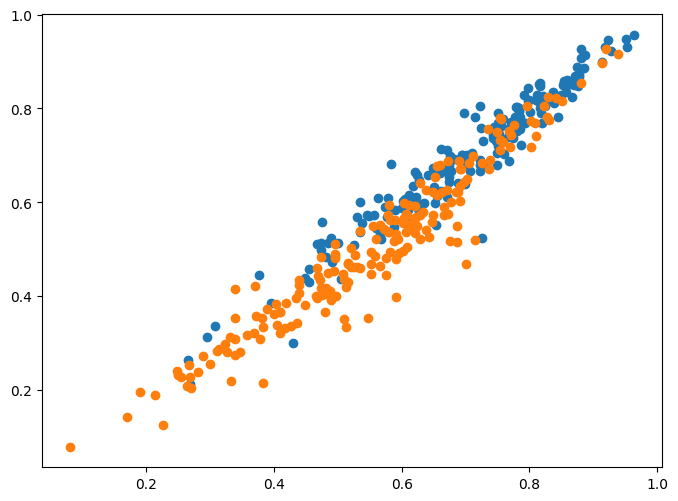

In [19]:
###Scatter plot for each cluster of two samples(Blue for wt, orange for dcp2) to test consistent
wt=pd.read_csv('./Data/list/combine/ID/rate/wt.csv')
dcp=pd.read_csv('./Data/list/combine/ID/rate/dcp2.csv')


wt1=wt.sample(n=200, frac=None, replace=False, weights=None, random_state=None, axis=None)
dcp2=dcp.sample(n=200, frac=None, replace=False, weights=None, random_state=None, axis=None)

plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})

plt.plot( 'wt1', 'wt2', data=wt1, linestyle='none', marker='o')

plt.plot( 'dcp2_1', 'dcp2_2', data=dcp2, linestyle='none', marker='o')



In [ ]:
###Spots are along the y=x axis, which means there is not much variance between two samples.

<BarContainer object of 5035 artists>

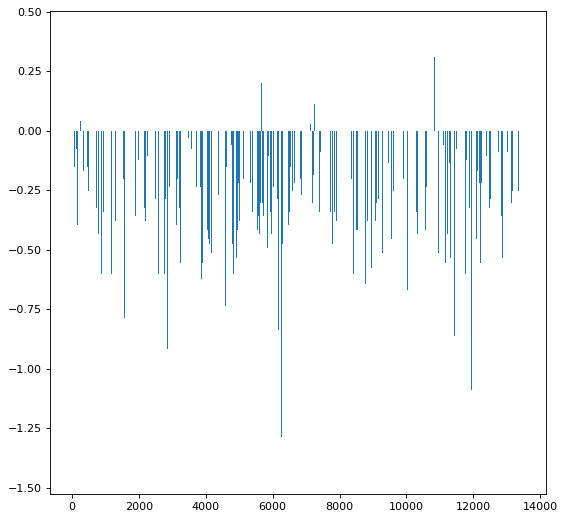

In [21]:
###log(dcp/wt) for each cluster illustrates capping rates of most clusters were downregulated after dcp2 mutant.

dcp=pd.read_csv('./Data/list/combine/ID/rate/merge/dcp2_l.csv')
dcp_h=dcp.loc[:,'log']
dcp_x=dcp.loc[:,'ID']


plt.figure(figsize=(8,8), dpi=80)
plt.figure(1)

plt.bar(x=dcp_x,height=dcp_h)


In [ ]:
### Capping rate of most of the clusters was downregulated, and there is obviously some significant 
### difference among the clusters. Some was highly influenced and some was less. 
### With this result, I can focus the cluster that was highly influenced and investigate how dcp2 mutant
### effects them.

In [29]:
###Then I downloaded a table contains all the transcription related protein
tables = pd.read_html('https://wiki.yeastgenome.org/index.php/Table_of_Gene_Summary_Paragraphs')

len(tables)
data=tables[24]
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,YAL065C,YALCdelta2,YALWdelta1,YAP1,YAR009C,YAR010C,YAR061W,YAR062W,YARCdelta3,YARCdelta4,YARCdelta5,YARCdelta8
1,YARCTy1-1,YARWdelta6,YARWdelta7,YARWsigma1,YBL005W-A,YBL005W-B,YBL100W-A,YBL100W-B,YBLCdelta7,YBLCtau1,YBLWdelta1,YBLWdelta10
2,YBLWdelta2,YBLWdelta3,YBLWdelta4,YBLWdelta5,YBLWdelta6,YBLWdelta8,YBLWdelta9,YBLWsigma1,YBLWTy1-1,YBLWTy2-1,YBR012W-A,YBR012W-B
3,YBRCdelta11,YBRCdelta14,YBRCdelta19,YBRCtau2,YBRWdelta12,YBRWdelta13,YBRWdelta15,YBRWdelta16,YBRWdelta17,YBRWdelta18,YBRWTy1-2,YCG1
4,YCL007C,YCL019W,YCL020W,YCL074W,YCL075W,YCLCdelta1,YCLWdelta15,YCLWdelta2a,YCLWdelta2b,YCLWdelta3,YCLWdelta4,YCLWdelta5
5,YCLWomega1,YCLWomega2,YCLWTy2-1,YCLWTy5-1,YCR102C,YCRCdelta14,YCRCdelta6,YCRCdelta7,YCRCtau1,YCRWdelta10,YCRWdelta11,YCRWdelta12
6,YCRWdelta13,YCRWdelta8,YCRWdelta9,YCRWomega3,YDC1,YDJ1,YDLCdelta1,YDLWtau1,YDR034C-C,YDR034C-D,YDR098C-A,YDR098C-B
7,YDR170W-A,YDR210C-C,YDR210C-D,YDR210W-A,YDR210W-B,YDR261C-C,YDR261C-D,YDR261W-A,YDR261W-B,YDR316W-A,YDR316W-B,YDR341C
8,YDR365W-A,YDR365W-B,YDRCdelta2,YDRCdelta21,YDRCdelta22,YDRCdelta3,YDRCdelta4,YDRCdelta5,YDRCdelta6a,YDRCdelta6b,YDRCdelta7,YDRCdelta8
9,YDRCdelta9,YDRCsigma1,YDRCsigma3,YDRCsigma4,YDRCsigma6,YDRCTy1-1,YDRCTy1-2,YDRCTy1-3,YDRCTy2-1,YDRWdelta10,YDRWdelta11,YDRWdelta12


In [38]:
### Find the transcriptional ralated cluster
tss=pd.read_csv('./Data/list/combine/ID/rate/wt1.csv')
tss_sort=tss.dropna(axis=0,subset = ["Assigned_gene_name"])
count=0
l=[]
fo = open("./wt1transpr.csv", "w")
writer = csv.writer(fo)
for i, row in tss_sort.iterrows():  
    gene=row['Assigned_gene_name']
    ID=row['ID']
    cap=row['cap']
    uncap=row['uncap']
    rate=row['wt1']
    if gene in data.values:
        count+=1
        l=[ID,cap,uncap,rate,gene]
        writer.writerow(l)

df=pd.read_csv('./wt1transpr.csv')
df

,131,27,3,0.9,YBL100W-A
0,224,76,109,0.410811,YBL005W-A
1,225,65,68,0.488722,YBL005W-A
2,619,459,85,0.843750,YCL019W
3,620,3,0,1.000000,YCL019W
4,621,3,0,1.000000,YCL019W
5,622,5,9,0.357143,YCL020W
6,1420,185,159,0.537791,YDR316W-A
7,1791,184,145,0.559271,YIL082W
8,2407,80,5,0.941176,YFL002W-A
9,2408,943,127,0.881308,YFL002W-A


In [39]:
###Conclusion: From this investigation, I found that
###1.Around 70% nucleotides in RNA were capped in wild type yeast which indicates capping is 
### a normal moditification of transcription. 
###2. Among four bases, capping rate of A/G  are higher than C/T, suggesting RNA is more likely to
### start with an A/G. 
###3. After mutating gene dcp2, capping rate decreased. However, dcp2 is a de-capping gene which means 
### the capping rate should have increased after removed it. This left me a question that I may need to 
### figure out the real funtion of dcp2.
###4. I can then focus on some other investigation with the clusters I found through this analysis. 
### 1)Highly effected by dcp2 mutant  2)the cluster assigned to transcriptional related genes

In [43]:
%%bash
git pull
git add Coding.ipynb
git commit -a -m "Finally submitting the final!"
git push

Already up to date.
[main 1300179] Finally submitting the final!
 1 file changed, 2614 insertions(+)
 create mode 100644 Final/Coding.ipynb


remote: This repository moved. Please use the new location:        
remote:   git@github.com:Xiaoniu86/hds5210-2021.git        
To github.com:xiaoniu86/hds5210-2021.git
   4200ac5..1300179  main -> main
